In [34]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [40]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report ,auc, roc_curve, roc_auc_score, precision_recall_curve,accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score

In [6]:
df = pd.read_pickle('data/df_kategorik.pkl')
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day,local,burak,days_in_waiting_list_range
0,1,0,342,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,3,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,7,01,1,0,0
1,1,0,737,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,4,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,7,01,1,0,0
2,1,0,7,2015,July,27,1,0,1,1,0.0,0,0,GBR,0,0,0,0,0,1,C,0,0,NaN,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,7,02,0,0,0
3,1,0,13,2015,July,27,1,0,1,1,0.0,0,0,GBR,1,1,0,0,0,1,A,0,0,304.0,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,7,02,0,0,0
4,1,0,14,2015,July,27,1,0,2,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,240.0,NaN,0,0,98.00,0,1,Check-Out,2015-07-03,2015,7,03,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,0.0,0,0,BEL,3,2,0,0,0,1,A,0,0,394.0,NaN,0,0,96.14,0,0,Check-Out,2017-09-06,2017,9,06,0,0,0
119386,0,0,102,2017,August,35,31,2,5,3,0.0,0,0,FRA,2,2,0,0,0,3,E,0,0,9.0,NaN,0,0,225.43,0,2,Check-Out,2017-09-07,2017,9,07,0,0,0
119387,0,0,34,2017,August,35,31,2,5,2,0.0,0,0,DEU,2,2,0,0,0,2,D,0,0,9.0,NaN,0,0,157.71,0,4,Check-Out,2017-09-07,2017,9,07,0,0,0
119388,0,0,109,2017,August,35,31,2,5,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,89.0,NaN,0,0,104.40,0,0,Check-Out,2017-09-07,2017,9,07,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119210 non-null  int64   
 1   is_canceled                     119210 non-null  int64   
 2   lead_time                       119210 non-null  int64   
 3   arrival_date_year               119210 non-null  int64   
 4   arrival_date_month              119210 non-null  object  
 5   arrival_date_week_number        119210 non-null  int64   
 6   arrival_date_day_of_month       119210 non-null  int64   
 7   stays_in_weekend_nights         119210 non-null  int64   
 8   stays_in_week_nights            119210 non-null  int64   
 9   adults                          119210 non-null  int64   
 10  children                        119206 non-null  float64 
 11  babies                          119210 non-null  int64   
 12  me

In [8]:
df.drop(['arrival_date_month','country','assigned_room_type','reservation_status','reservation_status_date','day','burak' ] , axis = 1, inplace = True)

In [10]:
df.drop(['company','agent'  ] , axis = 1, inplace = True)

In [11]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,local,days_in_waiting_list_range
0,1,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,0,0,0,0,3,0,0,0,0.0,0,0,2015,7,1,0
1,1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,0,0,0,0,4,0,0,0,0.0,0,0,2015,7,1,0
2,1,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,75.0,0,0,2015,7,0,0
3,1,0,13,2015,27,1,0,1,1,0.0,0,0,1,1,0,0,0,1,0,0,0,0,75.0,0,0,2015,7,0,0
4,1,0,14,2015,27,1,0,2,2,0.0,0,0,2,2,0,0,0,1,0,0,0,0,98.0,0,1,2015,7,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119210 non-null  int64   
 1   is_canceled                     119210 non-null  int64   
 2   lead_time                       119210 non-null  int64   
 3   arrival_date_year               119210 non-null  int64   
 4   arrival_date_week_number        119210 non-null  int64   
 5   arrival_date_day_of_month       119210 non-null  int64   
 6   stays_in_weekend_nights         119210 non-null  int64   
 7   stays_in_week_nights            119210 non-null  int64   
 8   adults                          119210 non-null  int64   
 9   children                        119206 non-null  float64 
 10  babies                          119210 non-null  int64   
 11  meal                            119210 non-null  int64   
 12  ma

In [23]:
df['children'].fillna(0, inplace=True)

In [24]:
X, y = df.drop('is_canceled',axis=1), df[['is_canceled']]

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_canceled   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     3940.
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:36:58   Log-Likelihood:                -43343.
No. Observations:              119210   AIC:                         8.674e+04
Df Residuals:                  119181   BIC:                         8.703e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -54.2091      3.847    -14.093      0.000     -61.748     -46.670
hotel                             -0.0433      0.002    -18.072      0.000      -0.048      -0.039
lead_time                         -0.0004   1.32e-05    -29.472      0.000      -0.000      -0.000
arrival_date_year                  1.1865      0.008    156.972      0.000       1.172       1.201
arrival_date_week_number           0.0238      0.000    133.591      0.000       0.023       0.024
arrival_date_day_of_month         -0.0009      0.000     -8.063      0.000      -0.001      -0.001
stays_in_weekend_nights            0.0220      0.001     18.576      0.000       0.020       0.024
stays_in_week_nights               0.0108      0.001     16.940      0.000       0.010       0.012
adults                             0.0255      0.002     13.647      0.000       0.022       0.029
children                           0.0194      0.003      6.781      0.000       0.014       0.025
babies                            -0.0172      0.010     -1.650      0.099      -0.038       0.003
meal                               0.0103      0.001     10.642      0.000       0.008       0.012
market_segment                    -0.0096      0.001     -8.711      0.000      -0.012      -0.007
distribution_channel               0.0678      0.002     36.416      0.000       0.064       0.071
is_repeated_guest                 -0.1422      0.007    -21.519      0.000      -0.155      -0.129
previous_cancellations             0.0208      0.001     16.837      0.000       0.018       0.023
previous_bookings_not_canceled    -0.0049      0.001     -6.510      0.000      -0.006      -0.003
reserved_room_type                 0.0059      0.001      5.715      0.000       0.004       0.008
booking_changes                   -0.0309      0.002    -18.951      0.000      -0.034      -0.028
deposit_type                       0.1054      0.002     45.339      0.000       0.101       0.110
days_in_waiting_list               0.0015      0.000     11.589      0.000       0.001       0.002
customer_type                     -0.0222      0.002    -14.683      0.000      -0.025      -0.019
adr                                0.0006   2.42e-05     26.201      0.000       0.001       0.001
required_car_parking_spaces       -0.2134      0.004    -49.439      0.000      -0.222      -0.205
total_of_special_requests         -0.0584      0.001    -41.433      0.000      -0.061      -0.056
year                              -1.1596      0.007   -156.788      0.000      -1.174      -1.145
month                             -0.1059      0.001   -147.663      0.000      -0.107      -0.105
local                              0.1981      0.002     79.621      0.000       0.193       0.203
days_in_waitin

In [30]:
print('Use LassoCV to find the optimal ALPHA value for L1 regularization')
# Scale the Predictors on both the train and validation set
std = StandardScaler()
std.fit(X.values)
X_scaled = std.transform(X.values)
print('X_scaled', X_scaled.shape)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_scaled, y)
# This is the best alpha value found
print('LASSO best alpha: ', lasso_model.alpha_ )
# display all coefficients in the model with optimal alpha

Use LassoCV to find the optimal ALPHA value for L1 regularization
X_scaled (119210, 29)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LASSO best alpha:  0.001


<ipython-input-35-78627c4d5cf8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfc.fit(X, y)


Text(0.5, 1.0, 'Top Features derived by Random Forest')

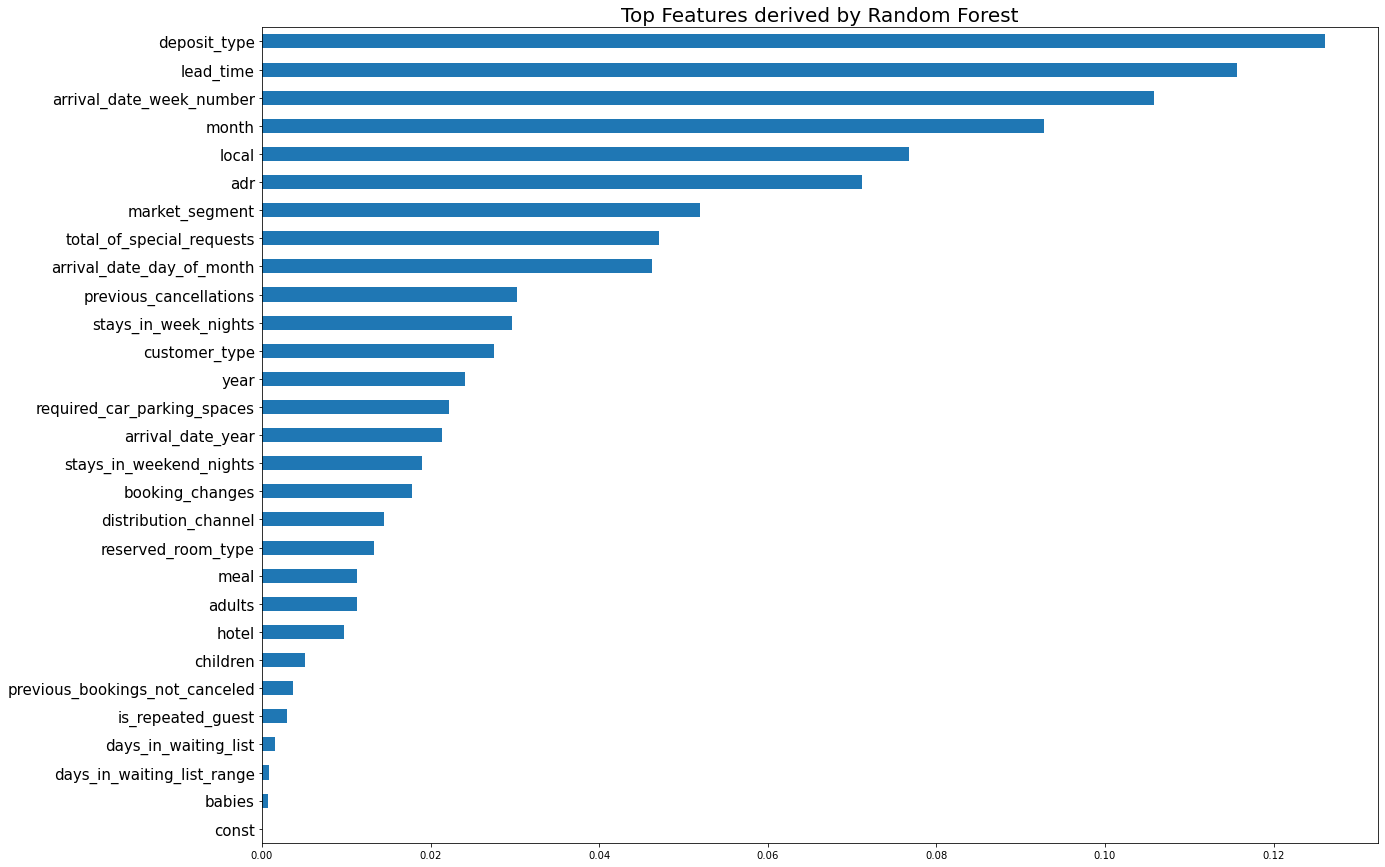

In [35]:
## To look for top features using Random Forest
# Create decision tree classifer object
rfc = RandomForestClassifier(random_state=0, n_estimators=100)

# Train model, note that NO scaling is required
model = rfc.fit(X, y)

# Plot the top features based on its importance
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(47)   # can adjust based on how many top features you want
   .plot(kind='barh', figsize=[20,15])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)


In [49]:
def model_scores(X_train,Y_train):
    sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
    sgd.fit(X_train, Y_train)
    sgd.score(X_train, Y_train)
    acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train, Y_train)
    random_forest.score(X_train, Y_train)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train) 
    acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

    gaussian = GaussianNB()
    gaussian.fit(X_train, Y_train)  
    acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

    perceptron = Perceptron(max_iter=5)
    perceptron.fit(X_train, Y_train)
    acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

    linear_svc = LinearSVC()
    linear_svc.fit(X_train, Y_train)
    acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

    decision_tree = DecisionTreeClassifier() 
    decision_tree.fit(X_train, Y_train) 
    acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)


    results = pd.DataFrame({
        'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                  'Random Forest', 'Naive Bayes', 'Perceptron', 
                  'Stochastic Gradient Decent', 
                  'Decision Tree'],
        'Score': [acc_linear_svc, acc_knn, acc_log, 
                  acc_random_forest, acc_gaussian, acc_perceptron, 
                  acc_sgd, acc_decision_tree]})
    result_df = results.sort_values(by='Score', ascending=False)
    result_df = result_df.set_index('Score')
    print(result_df)



In [50]:
model_scores(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-49-87ebf0c6a4c0>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

                            Model
Score                            
99.66               Random Forest
99.66               Decision Tree
91.02                         KNN
77.89         Logistic Regression
74.38     Support Vector Machines
66.84                  Perceptron
65.50  Stochastic Gradient Decent
62.28                 Naive Bayes


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')